In [6]:
import json
def ouvrir_json(chemin):
  f = open(chemin, encoding="utf-8")
  toto = json.load(f)
  f.close()
  return toto

def ecrire_json(chemin, contenu):
  w = open(chemin, "w", encoding="utf-8")
  w.write(json.dumps(contenu, indent=2, ensure_ascii=False))
  w.close()

dico_compte_partiemaj = ouvrir_json("dico_compte_partiemaj_sw_corr.json") #seulement sur articles avec claims de force diff
#dico_compte_partiemaj_tt = ouvrir_json("dico_claims_partiemaj_tt_sw.json") #sur tout
dico_compte_partiemaj_bp = ouvrir_json("dico_claims_partiemaj_bougentpas_sw_corr.json")#seulement sur ceux qui bougent pas

dico_compteur = ouvrir_json("dico_compteur_sw_corr.json") #sur tous
dico_compteur_art = ouvrir_json("dico_compteur_art_sw_corr.json") #sur articles seulement
dico_compteur_bp = ouvrir_json("dico_compteur_bp_sw_corr.json")#seulement sur ceux qui bougent pas

dico_total_partie = ouvrir_json("dico_total_partie_sw_corr.json") #sur tous
dico_total_partie_art = ouvrir_json("dico_total_partie_art_sw_corr.json") #sur articles seulement
dico_total_partie_bp = ouvrir_json("dico_total_partie_bp_sw_corr.json")#seulement sur ceux qui bougent pas

dico_compte_partiemaj = dico_total_partie

In [3]:
f = ouvrir_json("comparaison_claimsstopwordstotal.json")
new_f = {}
for chemin, dico in f.items():
    if ".body" not in chemin:
        new_f[chemin]=dico

ecrire_json("comparaison_claimsstopwordstotal_corr.json",new_f)

In [8]:
dico_nb_strength = {"0":dico_compteur["abstract"]["0"]+dico_compteur["ccl"]["0"]+dico_compteur["intro"]["0"]+dico_compteur["corps"]["0"], "1":dico_compteur["abstract"]["1"]+dico_compteur["ccl"]["1"]+dico_compteur["intro"]["1"]+dico_compteur["corps"]["1"],"2":dico_compteur["abstract"]["2"]+dico_compteur["ccl"]["2"]+dico_compteur["intro"]["2"]+dico_compteur["corps"]["2"]}
print(dico_nb_strength)
ecrire_json("dico_nb_strength_sw_corr.json",dico_nb_strength)

{'0': 327, '1': 6553, '2': 8064}


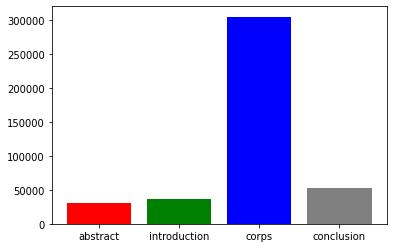

In [11]:
# tout => en prenant en compte doublons
import matplotlib.pyplot as plt
import pandas as pd

#data = {'ccl': 1456, 'abstract': 4747, 'intro': 1940}
#data = {'abstract': dico_compte_partiemaj["abstract"], 'ccl': dico_compte_partiemaj["ccl"],
        #'intro': dico_compte_partiemaj["intro"], 'corps': dico_compte_partiemaj["corps"]}

data = {'abstract':len(pd.read_csv("df_clusters_abstracts_stopwords_eq.csv")),'introduction':len(pd.read_csv("df_clusters_intros_stopwords_eq.csv")),'corps':len(pd.read_csv("df_clusters_corps_stopwords_eq.csv")),'conclusion':len(pd.read_csv("df_clusters_ccl_stopwords_eq.csv"))}
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names, color = ['r','g','b','grey'])
#plt.title('Proportion des parties où il y a le plus de claims')
plt.savefig("corr/proportion_claims_strength_tt_bar_sw_tt.png",bbox_inches='tight')
plt.show()


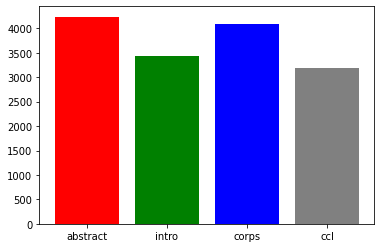

In [24]:
# tout
import matplotlib.pyplot as plt#data = {'ccl': 1456, 'abstract': 4747, 'intro': 1940}
data = {'abstract': dico_compte_partiemaj["abstract"],
        'intro': dico_compte_partiemaj["intro"], 'corps': dico_compte_partiemaj["corps"],'ccl': dico_compte_partiemaj["ccl"]}
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names, color = ['r','g','b','grey'])
#plt.title('Proportion des parties où il y a le plus de claims')
plt.savefig("corr/proportion_claims_strength_tt_bar_sw.png",bbox_inches='tight')
plt.show()


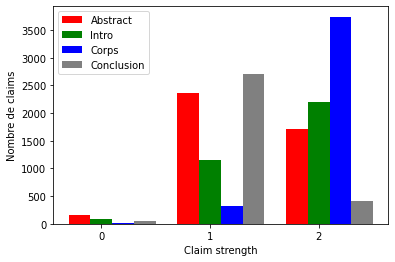

In [25]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.2
  
xlabels = []
xvals = []

for x, y in dico_compteur["abstract"].items():
    xlabels.append(x)
    xvals.append(y)
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
ylabels = []
yvals = []

for x, y in dico_compteur["intro"].items():
    ylabels.append(x)
    yvals.append(y)
bar2 = plt.bar(ind+width, yvals, width, color='g')

zzlabels = []
zzvals = []

for x, y in dico_compteur["corps"].items():
    zzlabels.append(x)
    zzvals.append(y)
bar3 = plt.bar(ind+width*2, zzvals, width, color = 'b')
  
zlabels = []
zvals = []

for x, y in dico_compteur["ccl"].items():
    zlabels.append(x)
    zvals.append(y)
bar4 = plt.bar(ind+width*3, zvals, width, color = 'grey')

  
plt.xlabel("Claim strength")
plt.ylabel('Nombre de claims')
#plt.title("Nombre de claims par catégorie selon la partie (tout)")
  
plt.xticks(ind+width,['0', '1', '2'])
plt.legend( (bar1, bar2, bar3, bar4), ('Abstract', 'Intro', 'Corps', 'Conclusion') )
plt.savefig("corr/proportion_claims_3bars_tt_sw.png",bbox_inches='tight')
plt.show()

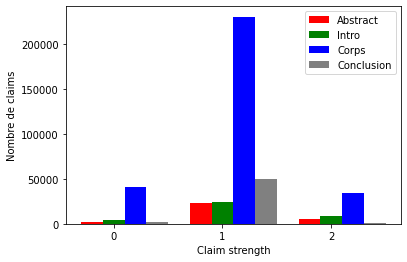

In [14]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.2

abst = pd.read_csv("df_clusters_abstracts_stopwords_eq.csv")
intro = pd.read_csv("df_clusters_intros_stopwords_eq.csv")
corps = pd.read_csv("df_clusters_corps_stopwords_eq.csv")
ccl = pd.read_csv("df_clusters_ccl_stopwords_eq.csv")

clusters_a = abst["cluster"].tolist()
clusters_i = intro["cluster"].tolist()
clusters_co = corps["cluster"].tolist()
clusters_cc = ccl["cluster"].tolist()
  
xlabels = ["zero","one","two"]
xvals = [clusters_a.count("zero"),clusters_a.count("one"),clusters_a.count("two")]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
ylabels = ["zero","one","two"]
yvals = [clusters_i.count("zero"),clusters_i.count("one"),clusters_i.count("two")]
bar2 = plt.bar(ind+width, yvals, width, color = 'g')    

zzlabels = ["zero","one","two"]
zzvals = [clusters_co.count("zero"),clusters_co.count("one"),clusters_co.count("two")]
bar3= plt.bar(ind+width*2, zzvals, width, color = 'b')

zlabels = ["zero","one","two"]
zvals = [clusters_cc.count("zero"),clusters_cc.count("one"),clusters_cc.count("two")]
bar4 = plt.bar(ind+width*3, zvals, width, color = 'grey')

plt.xlabel("Claim strength")
plt.ylabel('Nombre de claims')
#plt.title("Nombre de claims par catégorie selon la partie (tout)")
  
plt.xticks(ind+width,['0', '1', '2'])
plt.legend( (bar1, bar2, bar3, bar4), ('Abstract', 'Intro', 'Corps', 'Conclusion') )
plt.savefig("corr/proportion_claims_3bars_tt_sw_tt.png",bbox_inches='tight')
plt.show()

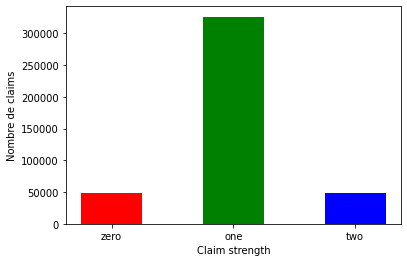

[49168, 325976, 49067]


In [18]:
#graphique avec proportion de chaque strength en tout
import pandas as pd
N = 3
ind = np.arange(N) 
width = 0.5

df = pd.concat(
    map(pd.read_csv, ["df_clusters_abstracts_stopwords_eq.csv","df_clusters_intros_stopwords_eq.csv",
        "df_clusters_corps_stopwords_eq.csv","df_clusters_ccl_stopwords_eq.csv"]), ignore_index=True)
clusters = df["cluster"]
clusters_l = clusters.tolist()

import numpy as np
import matplotlib.pyplot as plt
  
xlabels = ["zero","one","two"]
xvals = [clusters_l.count("zero"),clusters_l.count("one"),clusters_l.count("two")]

bar1 = plt.bar(ind, xvals, width, color = ['r','g','b'])

plt.xlabel("Claim strength")
plt.ylabel('Nombre de claims')
#plt.title("Nombre de claims par catégorie")
  
plt.xticks(ind,xlabels)
plt.savefig("corr/proportion_claims_3bars_mix_sw.png",bbox_inches='tight')
plt.show()

print(xvals)

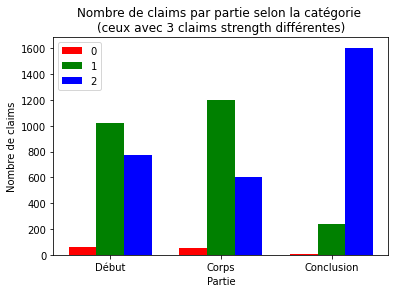

In [19]:
import numpy as np
import matplotlib.pyplot as plt

dico_evol = ouvrir_json("dico_evol_strength_sw_corr.json")
#{'abstract': {'0': 0, '1': 0, '2': 0}, 'intro': {'0': 0, '1': 0, '2': 0}, 'ccl': {'0': 0, '1': 0, '2': 0}, 'corps': {'0': 0, '1': 0, '2': 0}}
values = list(dico_evol.values())

N = 3
ind = np.arange(N) 
width = 0.25
  
n="0"
xvals = [dico_evol["début"][n],dico_evol["corps"][n],dico_evol["ccl"][n]]
bar1 = plt.bar(ind, xvals, width, color = 'r')
   
n="1"
yvals = [dico_evol["début"][n],dico_evol["corps"][n],dico_evol["ccl"][n]] #toutes les valeurs de 1
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
n="2"
zvals = [dico_evol["début"][n],dico_evol["corps"][n],dico_evol["ccl"][n]]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("Partie")
plt.ylabel('Nombre de claims')
plt.title("Nombre de claims par partie selon la catégorie \n(ceux avec 3 claims strength différentes)")
  
plt.xticks(ind+width,['Début', 'Corps', 'Conclusion'])
plt.legend( (bar1, bar2, bar3), ('0', '1', '2') )
plt.savefig("corr/proportion_claims_3bars_evol_sw.png",bbox_inches='tight')
plt.show()

In [20]:
ouvrir_json("dico_ordre3_sw_corr.json")

{'dict_values([2, 1, 2])': 617,
 'dict_values([1, 1, 2])': 488,
 'dict_values([0, 2, 2])': 22,
 'dict_values([2, 2, 1])': 64,
 'dict_values([1, 2, 2])': 413,
 'dict_values([1, 2, 1])': 100,
 'dict_values([2, 0, 2])': 26,
 'dict_values([0, 1, 2])': 22,
 'dict_values([2, 1, 1])': 60,
 'dict_values([1, 0, 2])': 17,
 'dict_values([0, 1, 1])': 8,
 'dict_values([2, 2, 0])': 1,
 'dict_values([0, 2, 1])': 3,
 'dict_values([0, 2, 0])': 2,
 'dict_values([1, 0, 1])': 3,
 'dict_values([0, 0, 2])': 1,
 'dict_values([2, 1, 0])': 2,
 'dict_values([2, 0, 1])': 3}

In [21]:
d = ouvrir_json("dico_claims_diff_bougentpas_sw_corr.json")
pb = 0
nb_0 = 0
nb_1 = 0
nb_2 = 0

for k,v in d.items():
    if len(v) > 1:
        pb+=1
    for l,b in v.items():
        if b==0:
            nb_0 +=1
        if b==1:
            nb_1 +=1
        if b==2:
            nb_2 +=1
            
print(pb, nb_0,nb_1,nb_2)

0 110 1169 187


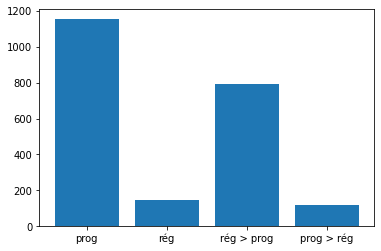

In [47]:
#regrouper : (ceux qui progressent/régressent/0,x,x)
#dico_ordre = {(2,1,0):41, (2,1,1):13, (2,1,2):7, (2,2,0):3, (1,0,1):3, (1,2,1):2, (2,0,0):2, (1,1,0):2, (2,2,1):1, (0,0,1):1,(1,0,0):1}

#rég > prof : type 2,1,2
#data = {"prog":584+28+505+25+10+1, "rég":78+64+1+4,"rég > prog":738+30+20+3+3,"prog > rég":114+3+2}
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
#plt.title('Proportion des articles selon la progression de la force des claims selon les parties')
plt.savefig("evolution_strength_regroupe_sw.png",bbox_inches='tight')
plt.show()

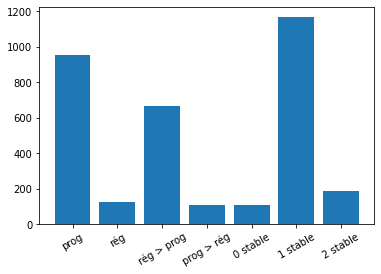

In [22]:
"""INCLURE LES TRUCS QUI BOUGENT PAS"""
#data = {"prog":584+28+505+25+10+1, "rég":78+64+1+4,"rég > prog":738+30+20+3+3,"prog > rég":114+3+2, "0 stable":112, "1 stable":1199, "2 stable":214}
data = {"prog":488+22+413+22+8+1, "rég":64+60+1+2,"rég > prog":617+26+17+3+3,"prog > rég":100+3+2, "0 stable":110, "1 stable":1169,"2 stable":187}
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(rotation=30)
#plt.title('Proportion des articles selon la progression de la force des claims selon les parties')
plt.savefig("corr/evolution_strength_regroupe_sw.png",bbox_inches='tight')
plt.show()

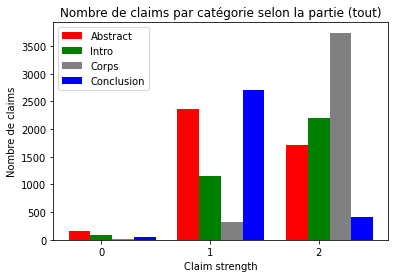

In [23]:
#dico_compteur = ouvrir_json("dico_compteurv06-2.json") #sur tous
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.2
  
xlabels = []
xvals = []

for x, y in dico_compteur["abstract"].items():
    xlabels.append(x)
    xvals.append(y)
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
ylabels = []
yvals = []

for x, y in dico_compteur["intro"].items():
    ylabels.append(x)
    yvals.append(y)
bar2 = plt.bar(ind+width, yvals, width, color='g')

zzlabels = []
zzvals = []

for x, y in dico_compteur["corps"].items():
    zzlabels.append(x)
    zzvals.append(y)
bar4 = plt.bar(ind+width*2, zzvals, width, color = 'grey')
  
zlabels = []
zvals = []

for x, y in dico_compteur["ccl"].items():
    zlabels.append(x)
    zvals.append(y)
bar3 = plt.bar(ind+width*3, zvals, width, color = 'b')

  
plt.xlabel("Claim strength")
plt.ylabel('Nombre de claims')
plt.title("Nombre de claims par catégorie selon la partie (tout)")
  
plt.xticks(ind+width,['0', '1', '2'])
plt.legend( (bar1, bar2, bar4,bar3), ('Abstract', 'Intro', 'Corps', 'Conclusion') )
plt.savefig("corr/proportion_claims_3bars_tt_sw.png",bbox_inches='tight')
plt.show()